In [1]:
# -*- coding: utf-8 -*-
# <nbformat>3.0</nbformat>

# <codecell>

# coding: utf-8
%matplotlib inline
import matplotlib
import scipy.integrate
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc ## desnecessário
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams.update({'font.size': 18})

plt.figure(figsize=(10,8))

#Discretização
M = 101 #espaço
N = 4000 #tempo
Tmax = 400.0

D = [1.0, 5.0, 1.0]
D = [1.0, 5.0, 1.0]


Text(0.5,1,u"Pop. centro do patch x $L'$ (Ordem 3)")

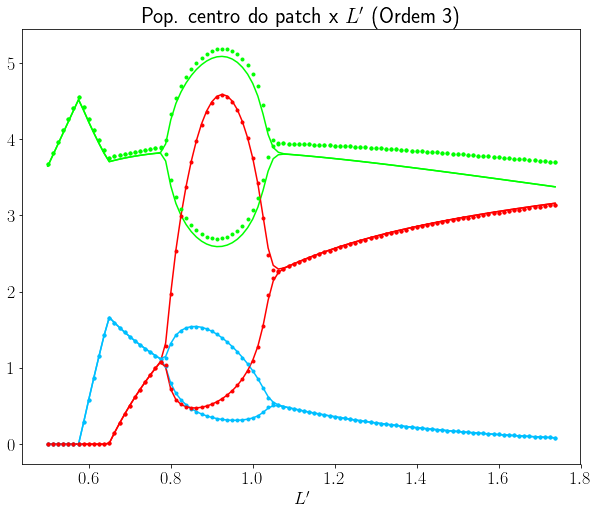

In [7]:
#Imprima os diagramas de bifurcação que compara a integração númerica direta da EDP com as EDOs do método variacional
#Atenção para os nomes dos arquivos

plt.figure(figsize=(10,8))
Nlvar = 100
Nlnum = 100
Lvar = [0.5 + 0.0125*j for j in range(0,Nlvar)]
Lnum = [0.5 + 0.0125*j for j in range(0,Nlnum)]

mu = 15
t = np.linspace(0,Tmax,N)
m = 1.0
gamma = 0.5
alpha = 1
beta = 8
phi = 1.0
D = [[1.0,5.0,1.0]]

#Variacional

#Third order

U1U2MAX = []
U1U2MIN = []
U3U4MAX = []
U3U4MIN = []
U5U6MAX = []
U5U6MIN = []

for d in D:
    print("D = " + str(d))
    D1,D2,DR = d[0],d[1],d[2]
    for l in Lvar:
        
        sol = np.load('Var_Method_IGP3_l = %.3f,DR=%.3f,D1=%.3f,D2=%.3f,mu=%.3f,gamma=%.3f,beta =%.3f.npy'
                % (l,DR,D1,D2,mu,gamma,beta))
                
        
        if DR > 0:
            
            U1 = sol[:,0]
            U2 = sol[:,1]
            U3 = sol[:,2]
            U4 = sol[:,3]
            U5 = sol[:,4]
            U6 = sol[:,5]
            U1U2MAX.append(np.max(U1[-1000:] - U2[-1000:]))
            U1U2MIN.append(np.min(U1[-1000:] - U2[-1000:]))
            U3U4MAX.append(np.max(U3[-1000:] - U4[-1000:]))
            U3U4MIN.append(np.min(U3[-1000:] - U4[-1000:]))
            U5U6MAX.append(np.max(U5[-1000:] - U6[-1000:]))
            U5U6MIN.append(np.min(U5[-1000:] - U6[-1000:]))

plt.plot(Lvar,U1U2MAX,color = 'lime')
plt.plot(Lvar,U1U2MIN,color = 'lime')
plt.plot(Lvar,U3U4MAX,color = 'deepskyblue')
plt.plot(Lvar,U3U4MIN,color = 'deepskyblue')
plt.plot(Lvar,U5U6MAX,color = 'red')
plt.plot(Lvar,U5U6MIN,color = 'red')
            

'''

#First order

B1B2MAX = []
B1B2MIN = []
A1MAX = []
A1MIN = []
A2MAX = []
A2MIN = []

for d in D:
    print("D = " + str(d))
    D1,D2,DR = d[0],d[1],d[2]
    for l in Lvar:
        sol = np.load('Var_Method_IGP_l = %.3f,DR=%.3f,D1=%.3f,D2=%.3f,mu=%.3f,gamma=%.3f,beta =%.3f.npy'
                % (l,DR,D1,D2,mu,gamma,beta))
        
        if DR > 0:
            B1B2 = sol[:,0]
            A1 = sol[:,1]
            A2 = sol[:,2]
            B1B2MAX.append(np.max(B1B2[-500:]))
            B1B2MIN.append(np.min(B1B2[-500:]))
            A1MAX.append(np.max(A1[-500:]))
            A1MIN.append(np.min(A1[-500:]))
            A2MAX.append(np.max(A2[-500:]))
            A2MIN.append(np.min(A2[-500:]))
        
        if DR == 0:
            B1 = sol[:,0]
            B2 = sol[:,1]            
            A1 = sol[:,2]
            A2 = sol[:,3]
            B1B2MAX.append(np.max(B1[-500:]-B2[-500:]))
            B1B2MIN.append(np.min(B1[-500:]-B2[-500:]))
            A1MAX.append(np.max(A1[-500:]))
            A1MIN.append(np.min(A1[-500:]))
            A2MAX.append(np.max(A2[-500:]))
            A2MIN.append(np.min(A2[-500:]))

plt.plot(Lvar,B1B2MAX,color = 'lime')
plt.plot(Lvar,B1B2MIN,color = 'lime')
plt.plot(Lvar,A1MAX,color = 'deepskyblue')
plt.plot(Lvar,A1MIN,color = 'deepskyblue')
plt.plot(Lvar,A2MAX,color = 'red')
plt.plot(Lvar,A2MIN,color = 'red')

'''


#Integração numérica
RMAX = []
RMIN = []
C1MAX = []
C1MIN = []
C2MAX = []
C2MIN = []

for d in D:
    print("D = " + str(d))
    D1,D2,DR = d[0],d[1],d[2]
    for l in Lnum:
        sol = np.load('Method_Of_LinesIGP_l = %.3f,DR=%.3f,D1=%.3f,D2=%.3f,mu=%.3f,gamma=%.3f,beta =%.3f.npy'
                % (l,DR,D1,D2,mu,gamma,beta))
        R = np.transpose(sol[:,0:M])
        C1 = np.transpose(sol[:,M:2*M])
        C2 = np.transpose(sol[:,2*M:])
        RMAX.append(np.max(R[M/2,-500:]))
        RMIN.append(np.min(R[M/2,-500:]))
        C1MAX.append(np.max(C1[M/2,-500:]))
        C1MIN.append(np.min(C1[M/2,-500:]))
        C2MAX.append(np.max(C2[M/2,-500:]))
        C2MIN.append(np.min(C2[M/2,-500:]))

plt.plot(Lnum,RMAX,color = 'lime',marker = '.',linestyle = "None")
plt.plot(Lnum,RMIN,color = 'lime',marker = '.',linestyle = "None")
plt.plot(Lnum,C1MAX,color = 'deepskyblue',marker = '.',linestyle = "None")
plt.plot(Lnum,C1MIN,color = 'deepskyblue',marker = '.',linestyle = "None")
plt.plot(Lnum,C2MAX,color = 'red',marker = '.',linestyle = "None")
plt.plot(Lnum,C2MIN,color = 'red',marker = '.',linestyle = "None") #Commais pontos talvez você possa colocar linestyle = "None"

plt.xlabel(r"$L'$")
plt.title(r"Pop. centro do patch x $L'$ (Ordem 3)")

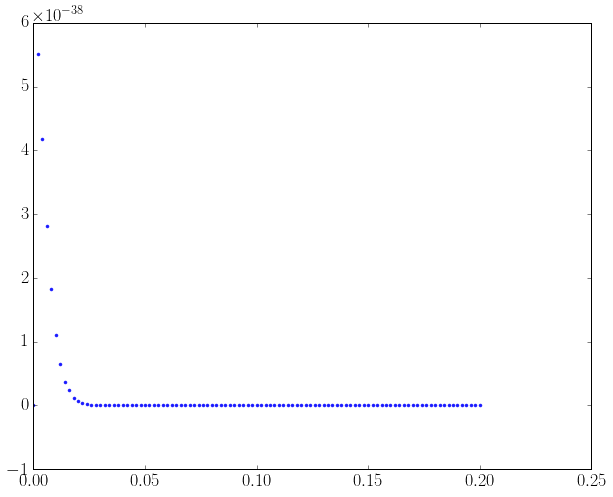

In [34]:
plt.figure(figsize=(10,8))
plt.plot(DN,maxv, marker = '.', linestyle="None", color = (DP[i], DP[i], DP[i]*10), label = DP[i])